<a href="https://colab.research.google.com/github/dasog94/deep_learning_for_everyone/blob/master/15_MNIST_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 1차원으로 만들고 255로 나누어 정규화하기
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 원-핫 인코딩
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

**모델 설정**

In [0]:
# 모델 프레임 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# 모델 프레임 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='valid', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# 모델 프레임 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), strides=2, activation='relu'))
model.add(Conv2D(64, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# 모델 프레임 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='valid', strides=2, activation='relu'))
model.add(Conv2D(64, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**모델 저장, 자동중단 (ModelCheckpoint, EarlyStopping)**

In [19]:
# 모델 최적화 설정
MODEL_DIR = '/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= "/model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모니터할 값: val_loss(test set 오차), verbose: 1이면 해당 함수의 진행 사항 출력, save_best_only
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10회 이상 성능 향상 없으면 earlystop

# 모델 실행 (epoch 30번, 샘플 200개)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



Epoch 00001: val_loss improved from inf to 0.05408, saving model to /model/01-0.0541.hdf5

Epoch 00002: val_loss improved from 0.05408 to 0.04109, saving model to /model/02-0.0411.hdf5

Epoch 00003: val_loss improved from 0.04109 to 0.03544, saving model to /model/03-0.0354.hdf5

Epoch 00004: val_loss improved from 0.03544 to 0.03424, saving model to /model/04-0.0342.hdf5

Epoch 00005: val_loss improved from 0.03424 to 0.02808, saving model to /model/05-0.0281.hdf5

Epoch 00006: val_loss did not improve from 0.02808

Epoch 00007: val_loss did not improve from 0.02808

Epoch 00008: val_loss improved from 0.02808 to 0.02783, saving model to /model/08-0.0278.hdf5

Epoch 00009: val_loss improved from 0.02783 to 0.02773, saving model to /model/09-0.0277.hdf5

Epoch 00010: val_loss did not improve from 0.02773

Epoch 00011: val_loss did not improve from 0.02773

Epoch 00012: val_loss did not improve from 0.02773

Epoch 00013: val_loss improved from 0.02773 to 0.02523, saving model to /model

In [22]:
# 모델 최적화 설정
MODEL_DIR = '/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= "/model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모니터할 값: val_loss(test set 오차), verbose: 1이면 해당 함수의 진행 사항 출력, save_best_only
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10회 이상 성능 향상 없으면 earlystop

# 모델 실행 (epoch 30번, 샘플 200개)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



Epoch 00001: val_loss improved from inf to 0.05403, saving model to /model/01-0.0540.hdf5

Epoch 00002: val_loss improved from 0.05403 to 0.03729, saving model to /model/02-0.0373.hdf5

Epoch 00003: val_loss improved from 0.03729 to 0.03181, saving model to /model/03-0.0318.hdf5

Epoch 00004: val_loss improved from 0.03181 to 0.02846, saving model to /model/04-0.0285.hdf5

Epoch 00005: val_loss did not improve from 0.02846

Epoch 00006: val_loss improved from 0.02846 to 0.02712, saving model to /model/06-0.0271.hdf5

Epoch 00007: val_loss did not improve from 0.02712

Epoch 00008: val_loss improved from 0.02712 to 0.02548, saving model to /model/08-0.0255.hdf5

Epoch 00009: val_loss did not improve from 0.02548

Epoch 00010: val_loss did not improve from 0.02548

Epoch 00011: val_loss improved from 0.02548 to 0.02493, saving model to /model/11-0.0249.hdf5

Epoch 00012: val_loss did not improve from 0.02493

Epoch 00013: val_loss did not improve from 0.02493

Epoch 00014: val_loss did 

In [25]:
# 모델 최적화 설정
MODEL_DIR = '/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= "/model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모니터할 값: val_loss(test set 오차), verbose: 1이면 해당 함수의 진행 사항 출력, save_best_only
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10회 이상 성능 향상 없으면 earlystop

# 모델 실행 (epoch 30번, 샘플 200개)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



Epoch 00001: val_loss improved from inf to 0.07139, saving model to /model/01-0.0714.hdf5

Epoch 00002: val_loss improved from 0.07139 to 0.04383, saving model to /model/02-0.0438.hdf5

Epoch 00003: val_loss improved from 0.04383 to 0.03807, saving model to /model/03-0.0381.hdf5

Epoch 00004: val_loss improved from 0.03807 to 0.03554, saving model to /model/04-0.0355.hdf5

Epoch 00005: val_loss improved from 0.03554 to 0.03310, saving model to /model/05-0.0331.hdf5

Epoch 00006: val_loss improved from 0.03310 to 0.02905, saving model to /model/06-0.0290.hdf5

Epoch 00007: val_loss improved from 0.02905 to 0.02756, saving model to /model/07-0.0276.hdf5

Epoch 00008: val_loss improved from 0.02756 to 0.02560, saving model to /model/08-0.0256.hdf5

Epoch 00009: val_loss did not improve from 0.02560

Epoch 00010: val_loss improved from 0.02560 to 0.02292, saving model to /model/10-0.0229.hdf5

Epoch 00011: val_loss did not improve from 0.02292

Epoch 00012: val_loss did not improve from 0

In [30]:
# 모델 최적화 설정
MODEL_DIR = '/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= "/model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모니터할 값: val_loss(test set 오차), verbose: 1이면 해당 함수의 진행 사항 출력, save_best_only
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10회 이상 성능 향상 없으면 earlystop

# 모델 실행 (epoch 30번, 샘플 200개)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



Epoch 00001: val_loss improved from inf to 0.07195, saving model to /model/01-0.0720.hdf5

Epoch 00002: val_loss improved from 0.07195 to 0.04877, saving model to /model/02-0.0488.hdf5

Epoch 00003: val_loss improved from 0.04877 to 0.04149, saving model to /model/03-0.0415.hdf5

Epoch 00004: val_loss improved from 0.04149 to 0.03660, saving model to /model/04-0.0366.hdf5

Epoch 00005: val_loss improved from 0.03660 to 0.03609, saving model to /model/05-0.0361.hdf5

Epoch 00006: val_loss improved from 0.03609 to 0.03100, saving model to /model/06-0.0310.hdf5

Epoch 00007: val_loss did not improve from 0.03100

Epoch 00008: val_loss improved from 0.03100 to 0.02919, saving model to /model/08-0.0292.hdf5

Epoch 00009: val_loss improved from 0.02919 to 0.02833, saving model to /model/09-0.0283.hdf5

Epoch 00010: val_loss improved from 0.02833 to 0.02554, saving model to /model/10-0.0255.hdf5

Epoch 00011: val_loss improved from 0.02554 to 0.02424, saving model to /model/11-0.0242.hdf5

E

**실행결과 그래프 표현**

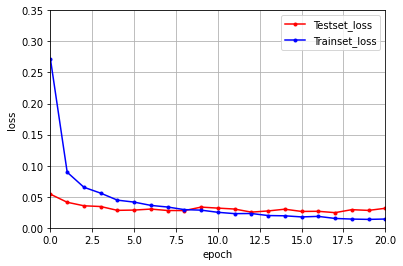

In [20]:
# 테스트 셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차 (1 - 학습셋정확도)
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35]) # 축 범위 표시
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


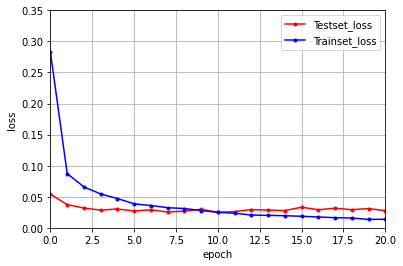

In [24]:
# 테스트 셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차 (1 - 학습셋정확도)
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35]) # 축 범위 표시
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


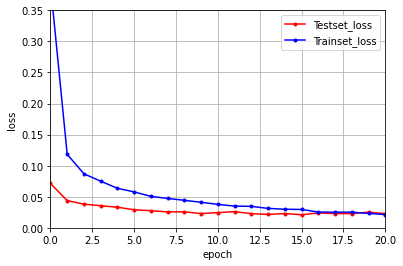

In [26]:
# 테스트 셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차 (1 - 학습셋정확도)
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35]) # 축 범위 표시
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


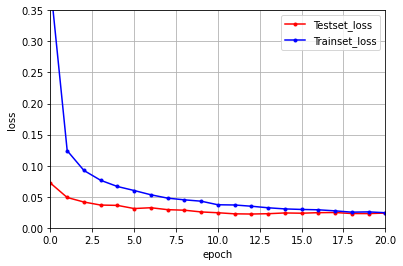

In [31]:
# 테스트 셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차 (1 - 학습셋정확도)
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35]) # 축 범위 표시
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()